# 📊 Case Study: Bitcoin (BTC) vs S&P 500

### By: Sebastian(Sechan) Jeon

---

## 🧠 Objective

This case study analyzes and gauges the performance, volatility, and correlation between **Bitcoin (BTC)** and the **S&P 500 index** over a defined period. The aim is to determine the higher-performing investment in the long term. The goals include:

- Measuring and comparing average **daily** and **annual** returns
- Analyzing risk and volatility using **Sharpe Ratio** and **Volume** 
- Investigating the correlation between BTC and S&P 500 using **Prices** and **Volatility**
---

## 📁 Data Sources

- **Bitcoin (BTC)**: Yahoo Finance — BTC-USD
- **S&P 500 Index**: Yahoo Finance — ^GSPC
- **Period**: [2014-09-17, 1950-01-03] to [2025-05-30]
- **Frequency**: Daily

In [3]:
library(tidyverse) 
list.files(path = "../input")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


character(0)

##### Loading the necessary libraries to prepare data

In [4]:
# Load necessary libraries
library(lubridate)
library(ggplot2)
library(dplyr)

In [5]:
# Financial Data
install.packages("quantmod")

# Load package
library(quantmod)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: xts

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



######################### Warning from 'xts' package ##########################
#                                                                             #
# The dplyr lag() function breaks how base R's lag() function is supposed to  #
# work, which breaks lag(my_xts). Calls to lag(my_xts) that you type or       #
# source() into this session won't work correctly.                            #
#                                                                             #
# Use stats::lag() to make sure you're not using dplyr::lag(), or you can add #
# conflictRules('dplyr', exclude = 'lag') to your .Rprofile to stop           #
# dplyr from breaking base R's lag() function.                                #
#                   

## 🔍 Data Preprocessing

The following steps prepare the data for analysis

- Loaded historical price data
- Stored price data for BTC and S&P 500 on respective data frames
- Aligned timeframes for both BTC and S&P 500
- Renamed necessary columns for simplicity
- Calculated daily/annual returns
- Handled missing values
- Performed calculations both with and without outliers

##### Loading BTC and S&P 500 data to respective data frames

In [6]:
#BTC data
btc_data <- getSymbols("BTC-USD", src = "yahoo", auto.assign = FALSE)
head(btc_data)

           BTC-USD.Open BTC-USD.High BTC-USD.Low BTC-USD.Close BTC-USD.Volume
2014-09-17      465.864      468.174     452.422       457.334       21056800
2014-09-18      456.860      456.860     413.104       424.440       34483200
2014-09-19      424.103      427.835     384.532       394.796       37919700
2014-09-20      394.673      423.296     389.883       408.904       36863600
2014-09-21      408.085      412.426     393.181       398.821       26580100
2014-09-22      399.100      406.916     397.130       402.152       24127600
           BTC-USD.Adjusted
2014-09-17          457.334
2014-09-18          424.440
2014-09-19          394.796
2014-09-20          408.904
2014-09-21          398.821
2014-09-22          402.152

In [7]:
# S&P 500 Data
sp500_data <- getSymbols("^GSPC", src = "yahoo", from = "1950-01-01", auto.assign = FALSE)
head(sp500_data)

           GSPC.Open GSPC.High GSPC.Low GSPC.Close GSPC.Volume GSPC.Adjusted
1950-01-03     16.66     16.66    16.66      16.66     1260000         16.66
1950-01-04     16.85     16.85    16.85      16.85     1890000         16.85
1950-01-05     16.93     16.93    16.93      16.93     2550000         16.93
1950-01-06     16.98     16.98    16.98      16.98     2010000         16.98
1950-01-09     17.08     17.08    17.08      17.08     2520000         17.08
1950-01-10     17.03     17.03    17.03      17.03     2160000         17.03

In [8]:
btc_df <- data.frame(Date = index(btc_data), coredata(btc_data))
View(btc_df)

Date,BTC.USD.Open,BTC.USD.High,BTC.USD.Low,BTC.USD.Close,BTC.USD.Volume,BTC.USD.Adjusted
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2014-09-17,465.864,468.174,452.422,457.334,21056800,457.334
2014-09-18,456.860,456.860,413.104,424.440,34483200,424.440
2014-09-19,424.103,427.835,384.532,394.796,37919700,394.796
2014-09-20,394.673,423.296,389.883,408.904,36863600,408.904
2014-09-21,408.085,412.426,393.181,398.821,26580100,398.821
2014-09-22,399.100,406.916,397.130,402.152,24127600,402.152
2014-09-23,402.092,441.557,396.197,435.791,45099500,435.791
2014-09-24,435.751,436.112,421.132,423.205,30627700,423.205
2014-09-25,423.156,423.520,409.468,411.574,26814400,411.574


In [9]:
sp500_df <- data.frame(Date = index(sp500_data), coredata(sp500_data))
View(sp500_df)

Date,GSPC.Open,GSPC.High,GSPC.Low,GSPC.Close,GSPC.Volume,GSPC.Adjusted
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1950-01-03,16.66,16.66,16.66,16.66,1260000,16.66
1950-01-04,16.85,16.85,16.85,16.85,1890000,16.85
1950-01-05,16.93,16.93,16.93,16.93,2550000,16.93
1950-01-06,16.98,16.98,16.98,16.98,2010000,16.98
1950-01-09,17.08,17.08,17.08,17.08,2520000,17.08
1950-01-10,17.03,17.03,17.03,17.03,2160000,17.03
1950-01-11,17.09,17.09,17.09,17.09,2630000,17.09
1950-01-12,16.76,16.76,16.76,16.76,2970000,16.76
1950-01-13,16.67,16.67,16.67,16.67,3330000,16.67


##### Renaming frequently references columns

In [10]:
#renaming BTC closing price and volume col
names(btc_df)[names(btc_df) == "BTC.USD.Close"] <- "close_price"
names(btc_df)[names(btc_df) == "BTC.USD.Volume"] <- "volume"

In [11]:
#renaming sp500 closing price and volume col
names(sp500_df)[names(sp500_df) == "GSPC.Close"] <- "close_price"
names(sp500_df)[names(sp500_df) == "GSPC.Volume"] <- "volume"

In [12]:
colnames(btc_df)
colnames(sp500_df)

[1] "Date"             "BTC.USD.Open"     "BTC.USD.High"     "BTC.USD.Low"     
[5] "close_price"      "volume"           "BTC.USD.Adjusted"

[1] "Date"          "GSPC.Open"     "GSPC.High"     "GSPC.Low"     
[5] "close_price"   "volume"        "GSPC.Adjusted"


## 📈 Price Trends

Visual comparison of BTC and S&P 500 price evolution over time. Normalized prices to make trends comparable.
Both assets are trending upwards in the long term.


`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'


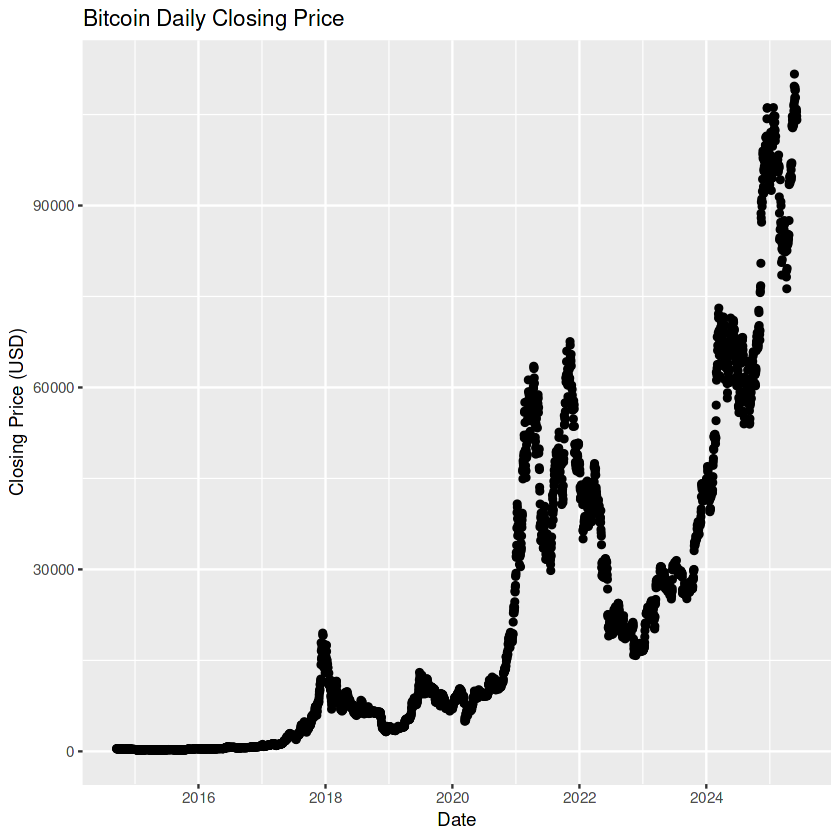

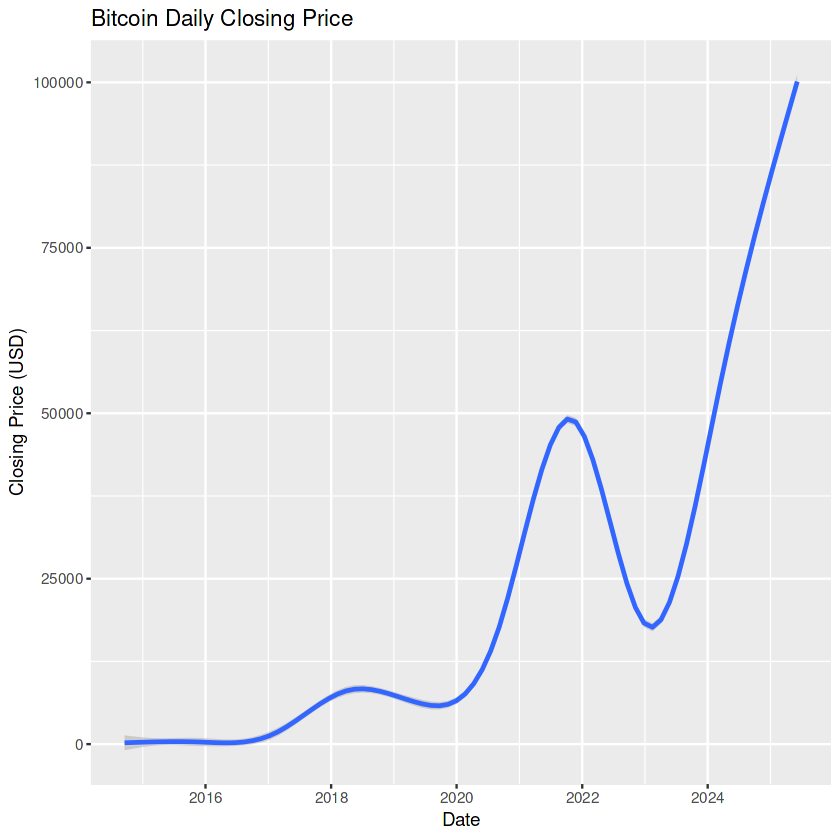

In [13]:
#Rough sketch of BTC performance
ggplot(data = btc_df) +
    geom_point(mapping=aes(x = Date, y = close_price)) +
    labs(title = "Bitcoin Daily Closing Price", x = "Date", y = "Closing Price (USD)")


ggplot(data = btc_df) +
    geom_smooth(mapping=aes(x = Date, y = close_price)) +
    labs(title = "Bitcoin Daily Closing Price", x = "Date", y = "Closing Price (USD)")

`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'


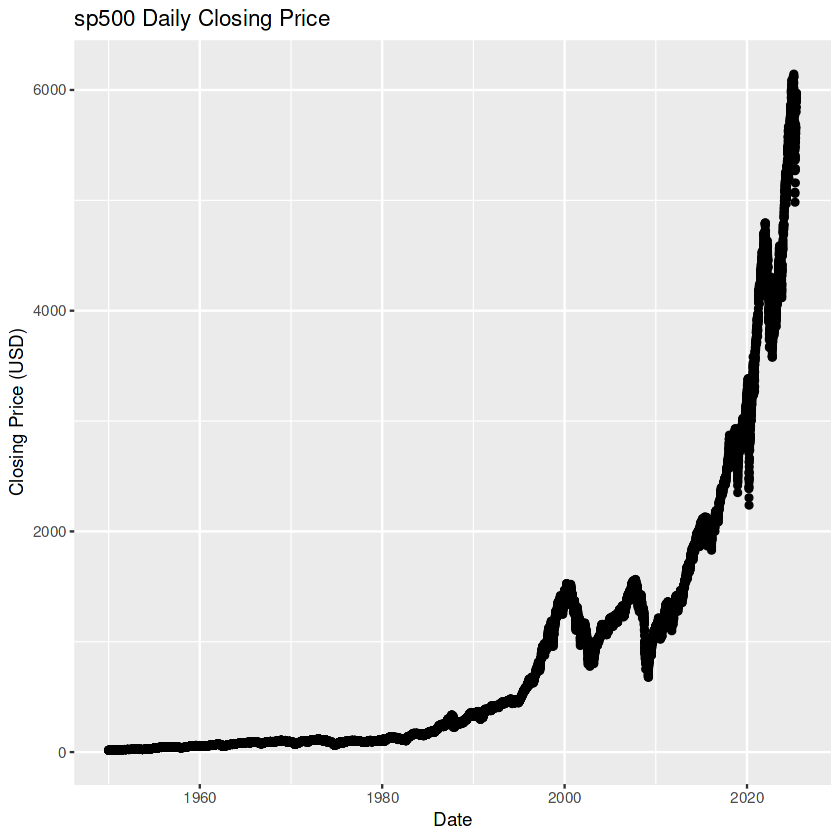

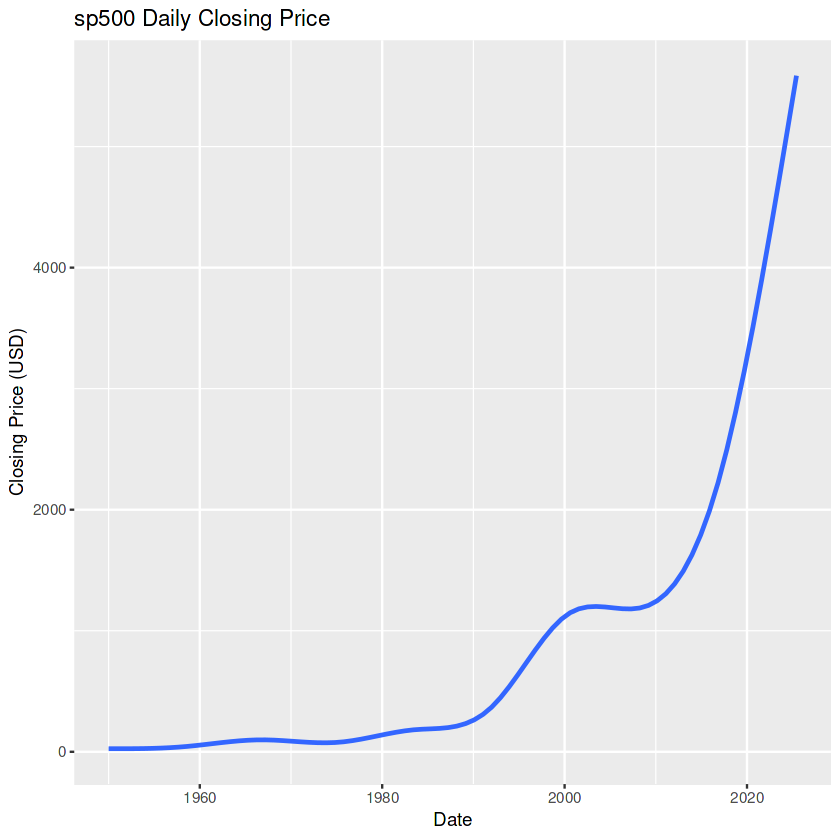

In [14]:
#Rough sketch of sp500 performance
ggplot(data = sp500_df) +
    geom_point(mapping=aes(x = Date, y = close_price)) +
    labs(title = "sp500 Daily Closing Price", x = "Date", y = "Closing Price (USD)")


ggplot(data = sp500_df) +
    geom_smooth(mapping=aes(x = Date, y = close_price)) +
    labs(title = "sp500 Daily Closing Price", x = "Date", y = "Closing Price (USD)")

In [15]:
#Enable SQL usage
install.packages("sqldf")
library(sqldf)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: gsubfn

Loading required package: proto

Warning message:
“no DISPLAY variable so Tk is not available”
Loading required package: RSQLite



##### Utilizing SQL to calculate annual average returns

In [16]:
#SQL btc_df, *NOTE the start date, does not account for the whole year of 2014
result <- sqldf("SELECT Date, close_price,volume FROM btc_df ORDER BY Date LIMIT 10")
print(result)

         Date close_price   volume
1  2014-09-17     457.334 21056800
2  2014-09-18     424.440 34483200
3  2014-09-19     394.796 37919700
4  2014-09-20     408.904 36863600
5  2014-09-21     398.821 26580100
6  2014-09-22     402.152 24127600
7  2014-09-23     435.791 45099500
8  2014-09-24     423.205 30627700
9  2014-09-25     411.574 26814400
10 2014-09-26     404.425 21460800


In [17]:
#SQL sp500_df
result <- sqldf("SELECT Date, close_price,volume FROM sp500_df ORDER BY Date LIMIT 10")
print(result)

         Date close_price  volume
1  1950-01-03       16.66 1260000
2  1950-01-04       16.85 1890000
3  1950-01-05       16.93 2550000
4  1950-01-06       16.98 2010000
5  1950-01-09       17.08 2520000
6  1950-01-10       17.03 2160000
7  1950-01-11       17.09 2630000
8  1950-01-12       16.76 2970000
9  1950-01-13       16.67 3330000
10 1950-01-16       16.72 1460000


## 📉 Annual Returns Analysis

- Histograms of annual returns
- Box plots comparing the volatility of annual returns
- Metrics:
  - Mean daily/annual return
  - Standard deviation/Sharpe Ratio
  - Price and Volume Correlation

##### Utilizing SQL to transform data into annual format and calculate average return

#### 🧮 SQL-Based Annual Return Calculation
Using sqldf, I performed the following steps:

Extract yearly bounds – identified the first and last date of each year.

Retrieve start-of-year and end-of-year prices for each year.

Calculate annual return

##### BTC annual return

In [18]:
# Ensure proper date format
btc_df$Date <- as.Date(btc_df$Date, format = "%Y-%m-%d")
btc_df$Date_str <- format(btc_df$Date, "%Y-%m-%d")

#BTC average annual return
btc_return <- sqldf("
WITH yearly_bounds AS
(SELECT 
    MIN(Date_str) AS earliest, 
    MAX(Date_str) AS latest,
    strftime('%Y', Date_str) AS year
FROM btc_df
GROUP BY strftime('%Y', Date_str)
),

closing_end_prices AS 
(SELECT bdf.Date_str, bdf.close_price, strftime('%Y', Date_str) AS year
FROM btc_df bdf
INNER JOIN yearly_bounds yb ON strftime('%Y', bdf.Date_str) = yb.year AND
(bdf.Date_str =  yb.earliest OR bdf.Date_str = yb.latest)
),

price_positions AS 
(
SELECT yb.year,
MAX(CASE WHEN cep.Date_str = yb.latest THEN cep.close_price END) AS latest_price,
MIN(CASE WHEN cep.Date_str = yb.earliest THEN cep.close_price END) AS earliest_price
FROM closing_end_prices cep
INNER JOIN yearly_bounds yb ON cep.year = yb.year
GROUP BY yb.year
)

SELECT year, ROUND(((latest_price - earliest_price) * 100 /earliest_price),2) AS annual_returns
FROM price_positions
ORDER BY year

")

print(btc_return)

#btc average annual return from 2014~2025
average_annual_return <- btc_return %>%
    summarize(avg = mean(annual_returns))
print(average_annual_return)


   year annual_returns
1  2014         -29.99
2  2015          37.01
3  2016         121.89
4  2017        1318.02
5  2018         -72.60
6  2019          87.16
7  2020         302.79
8  2021          57.64
9  2022         -65.30
10 2023         154.23
11 2024         111.53
12 2025          10.28
       avg
1 169.3883


##### S&P 500 annual return

In [19]:
# Ensure proper date format
sp500_df$Date <- as.Date(sp500_df$Date, format = "%Y-%m-%d")
sp500_df$Date_str <- format(sp500_df$Date, "%Y-%m-%d")


#sp500 average annual return
sp500_return <- sqldf("
WITH yearly_bounds AS
(SELECT 
    MIN(Date_str) AS earliest, 
    MAX(Date_str) AS latest,
    strftime('%Y', Date_str) AS year
FROM sp500_df
GROUP BY strftime('%Y', Date_str)
),

closing_end_prices AS 
(SELECT sdf.Date_str, sdf.close_price, strftime('%Y', Date_str) AS year
FROM sp500_df sdf
INNER JOIN yearly_bounds yb ON strftime('%Y', sdf.Date_str) = yb.year AND
(sdf.Date_str =  yb.earliest OR sdf.Date_str = yb.latest)
),

price_positions AS 
(
SELECT yb.year,
MAX(CASE WHEN cep.Date_str = yb.latest THEN cep.close_price END) AS latest_price,
MIN(CASE WHEN cep.Date_str = yb.earliest THEN cep.close_price END) AS earliest_price
FROM closing_end_prices cep
INNER JOIN yearly_bounds yb ON cep.year = yb.year
GROUP BY yb.year
)

SELECT year, ROUND(((latest_price - earliest_price) * 100 /earliest_price),2) AS annual_returns
FROM price_positions
ORDER BY year

")

print(sp500_return)

#sp500 average annual return from 1950~2025
average_annual_return <- sp500_return %>%
    summarize(avg = mean(annual_returns))
print(average_annual_return)


   year annual_returns
1  1950          22.63
2  1951          14.44
3  1952          11.64
4  1953          -6.52
5  1954          44.21
6  1955          23.76
7  1956           3.34
8  1957         -13.44
9  1958          36.90
10 1959           8.03
11 1960          -3.00
12 1961          24.28
13 1962         -11.08
14 1963          19.67
15 1964          12.36
16 1965           9.74
17 1966         -12.86
18 1967          20.02
19 1968           8.06
20 1969         -11.42
21 1970          -0.91
22 1971          12.00
23 1972          16.11
24 1973         -18.09
25 1974         -29.81
26 1975          28.42
27 1976          18.22
28 1977         -11.12
29 1978           2.44
30 1979          11.59
31 1980          28.37
32 1981         -10.11
33 1982          14.58
34 1983          19.22
35 1984           1.95
36 1985          27.76
37 1986          15.54
38 1987           0.26
39 1988           8.51
40 1989          28.36
41 1990          -8.19
42 1991          27.77
43 1992    

### 📌 Average Annual Return
169.5267 vs 9.207368

BTC's average annual returns seems to be significantly higher than that of the S&P 500 index. Note, however, BTC's higher volatility and outlier year, 2017.

---

## 📊 Visualizing BTC and S&P 500 Annual Returns

To understand the year-over-year performance of Bitcoin and the S&P 500, I plotted the **annual returns** for each asset using bar charts.

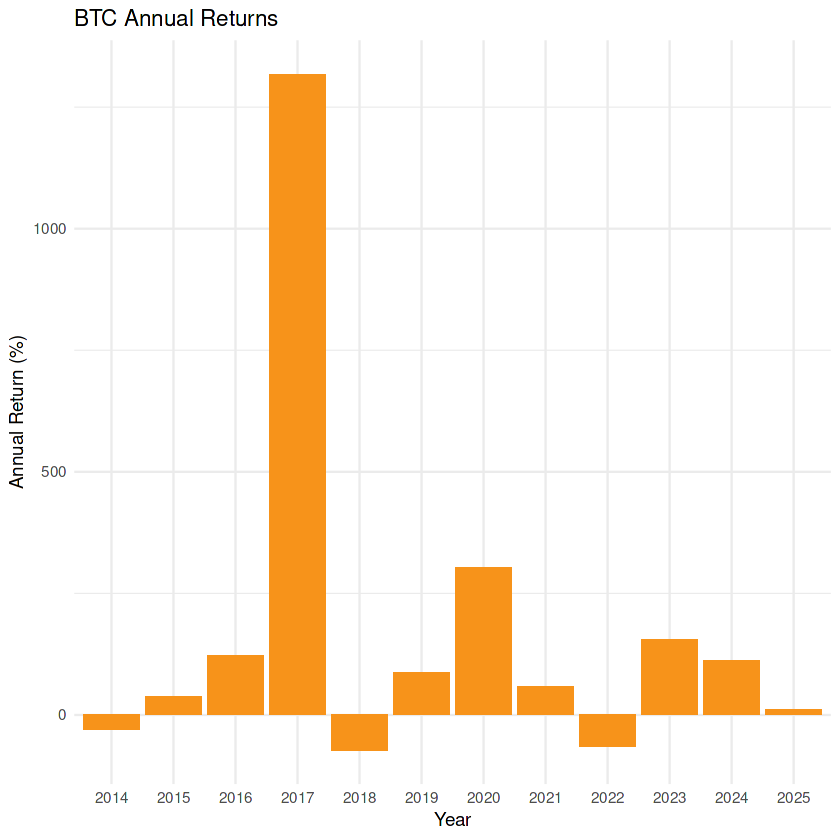

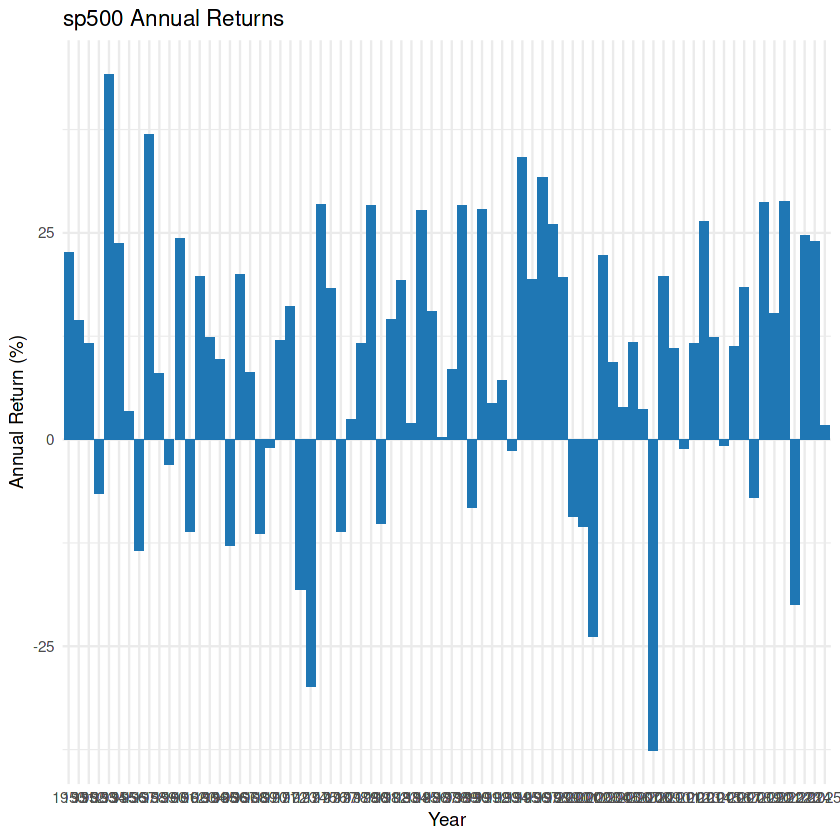

In [20]:
#Visualizing BTC AND sp500 returns
ggplot(data = btc_return, aes(x=year,y=annual_returns)) + geom_bar(stat = "identity", fill = "#f7931a") + labs(title = "BTC Annual Returns",
       x = "Year",
       y = "Annual Return (%)") + theme_minimal() 

ggplot(data = sp500_return, aes(x=year,y=annual_returns)) + geom_bar(stat = "identity", fill = "#1f77b4") + labs(title = "sp500 Annual Returns",
       x = "Year",
       y = "Annual Return (%)") + theme_minimal() 

##### Visualizing returns side by side to gauge volatility comparison between two assets.

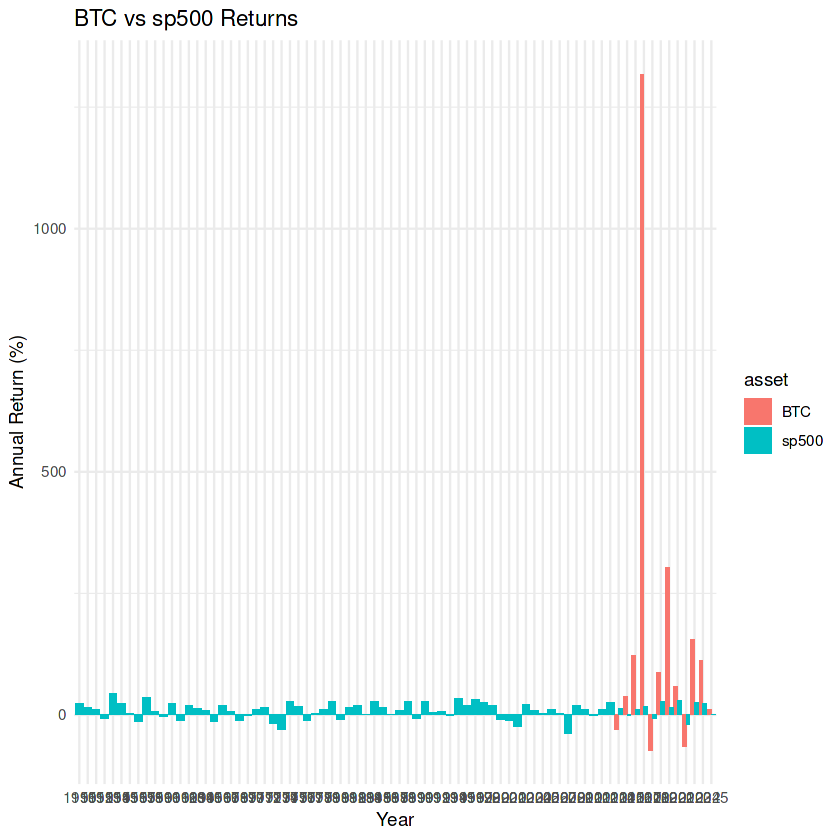

In [21]:
btc_return$asset <- "BTC"
sp500_return$asset <- "sp500"

combined_returns <- rbind(btc_return,sp500_return)

ggplot(data=combined_returns) + geom_bar(mapping=aes(x=year,y=annual_returns, fill = asset), stat = "identity", position = "dodge") + labs(title = "BTC vs sp500 Returns" , 
                                                                                                                                           x = "Year",
                                                                                                                                           y = "Annual Return (%)") + theme_minimal()

##### Isolating returns between 2014-2025 to see return volatility for overlapping years.

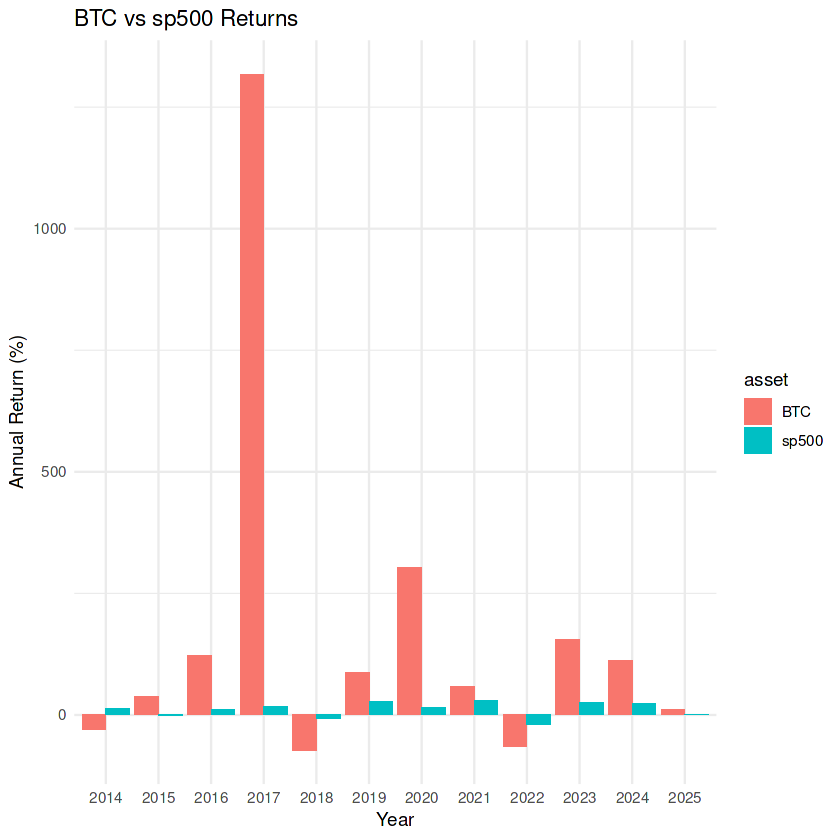

In [22]:
#Extracting sp500 returns for 2014~2025
filtered_sp500 <- sp500_return %>%
    filter(year >= 2014)

combined_returns <- rbind(btc_return,filtered_sp500)

ggplot(data=combined_returns) + geom_bar(mapping=aes(x=year,y=annual_returns, fill = asset), stat = "identity", position = "dodge") + labs(title = "BTC vs sp500 Returns" , 
                                                                                                                                           x = "Year",
                                                                                                                                           y = "Annual Return (%)") + theme_minimal()

In [23]:
#getting sp500 avg annual return from 2014
sp500filtered <- filtered_sp500 %>%
    summarize(sp500_avg_returns_from_2014 = mean(annual_returns))
print(sp500filtered)

  sp500_avg_returns_from_2014
1                     11.4725


##### Here, I exclude BTC's outlier year, 2017, to calculate average return. Still BTC performs significantly better, even when excluding the price spike in 2017.

In [24]:
#excluding btc return outlier year, 2017
btcfiltered <- btc_return %>%
    filter(year != 2017) %>%
    summarize(filtered_btc_avg_return = mean(annual_returns))
print(btcfiltered)

  filtered_btc_avg_return
1                64.96727


## 📈 Trend Comparison: BTC vs S&P 500 Annual Returns

To visually compare Bitcoin's and the S&P 500's performance trends, I created line plots showing annual returns from 2014 onward.

The first visualization illustrates BTC's full historical performance, including the extraordinary return for 2017, while the second better compares the year-to-year fluctuations without the skew of 2017.

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


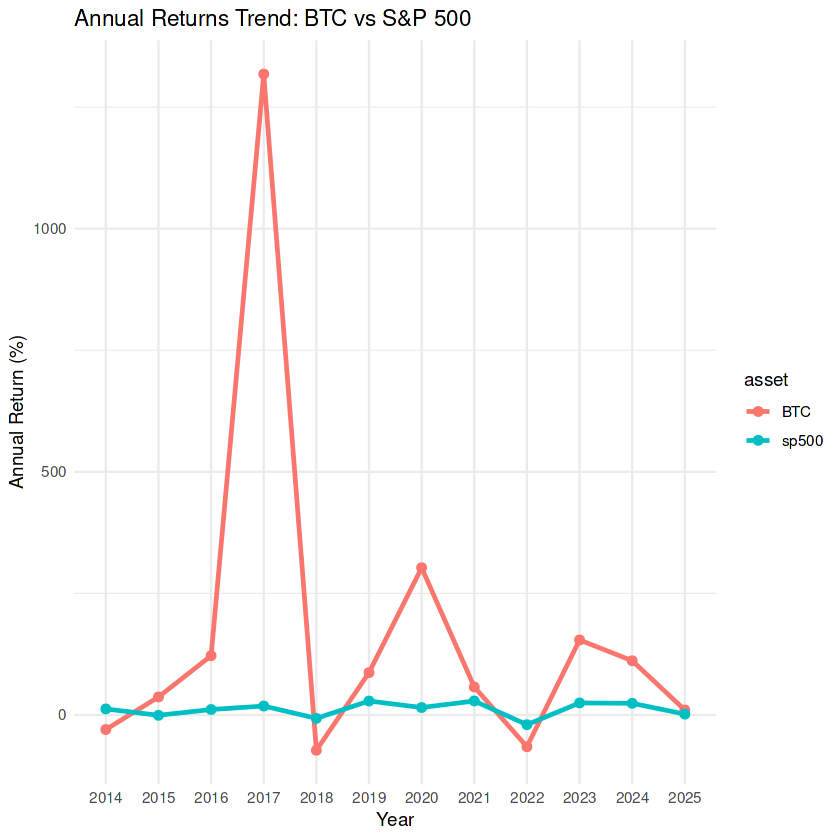

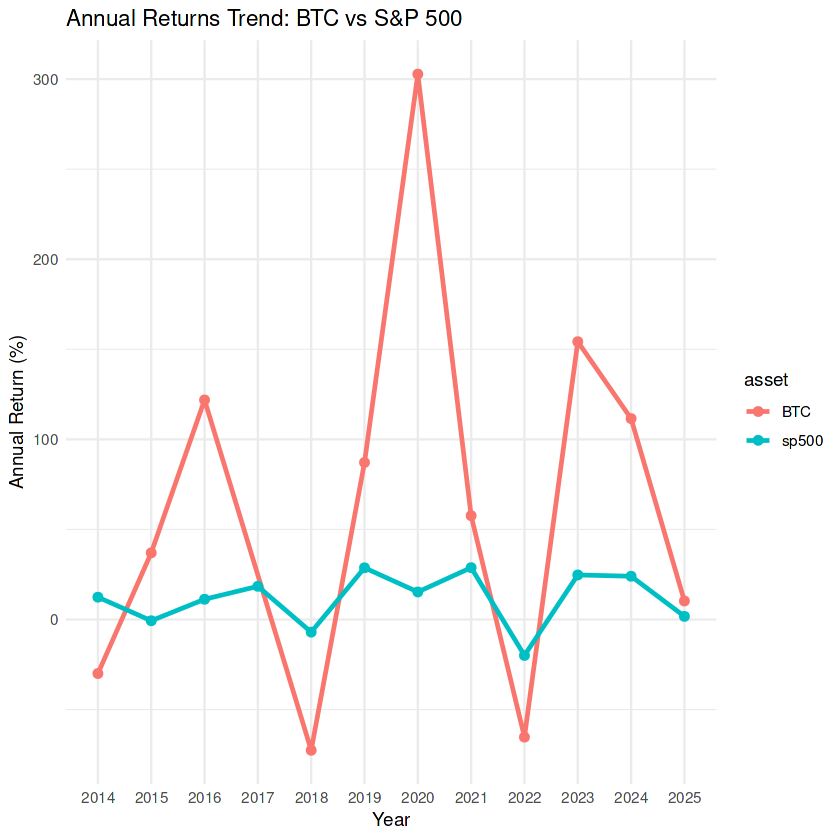

In [25]:
#Trend graph BTC vs sp500, including 2017 for BTC
btc_trend <- btc_return %>%
    mutate(asset = "BTC")

sp500_trend <- sp500_return %>%
    filter(year >= 2014) %>%
    mutate(asset = "sp500")

combined_trend <- rbind(btc_trend,sp500_trend)

ggplot(data=combined_trend, aes(x=year,y=annual_returns,group=asset,color=asset)) + geom_line(size=1) + geom_point(size=2) + labs(title = "Annual Returns Trend: BTC vs S&P 500",
       x = "Year",
       y = "Annual Return (%)") +
  theme_minimal()

#Trend graph BTC vs sp500, excluding 2017 for BTC
btc_trend <- btc_return %>%
    filter(year != 2017) %>%
    mutate(asset = "BTC")

combined_trend <- rbind(btc_trend,sp500_trend)

ggplot(data=combined_trend, aes(x=year,y=annual_returns,group=asset,color=asset)) + geom_line(size=1) + geom_point(size=2) + labs(title = "Annual Returns Trend: BTC vs S&P 500",
       x = "Year",
       y = "Annual Return (%)") +
  theme_minimal()

### 🧠 Insight
Bitcoin appears far more volatile but also shows better performance and growth potential.

The S&P 500 highly underperforms, but remains relatively stable, highlighting its role as a consistent, lower-risk asset.

## 📊 Sharpe Ratio Analysis: BTC vs S&P 500

To evaluate the **risk-adjusted return** of Bitcoin and the S&P 500, I calculate the **Sharpe Ratio** for each asset. This metric indicates how much excess return is received for the extra volatility endured by holding a riskier asset.

In [26]:
#Sharpe Ratio for btc & sp500
risk_free_rate <- 4.5 #approximate current treasury rate

#BTC Sharpe Ratio
btc_sharpe <- btc_return %>%
  summarize(
    avg_return = mean(annual_returns),
    sd_return = sd(annual_returns),
    btc_sharpe_ratio = (avg_return - risk_free_rate) / sd_return
  )
print(btc_sharpe)

#sp500 Sharpe Ratio
sp500_sharpe <- sp500_return %>%
  summarize(
    avg_return = mean(annual_returns),
    sd_return = sd(annual_returns),
    sp500_sharpe_ratio = (avg_return - risk_free_rate) / sd_return
  )
print(sp500_sharpe)

  avg_return sd_return btc_sharpe_ratio
1   169.3883  376.4018        0.4380647
  avg_return sd_return sp500_sharpe_ratio
1   9.207368  16.35009          0.2879109


### 🔍 Interpretation
A higher Sharpe Ratio implies better risk-adjusted performance.

Since BTC's Sharpe Ratio is significantly higher despite its higher standard deviation, this indicates that BTC provides better return per unit of risk, despite its volatility.


##### Visualizing Sharpe Ratio using bar graph

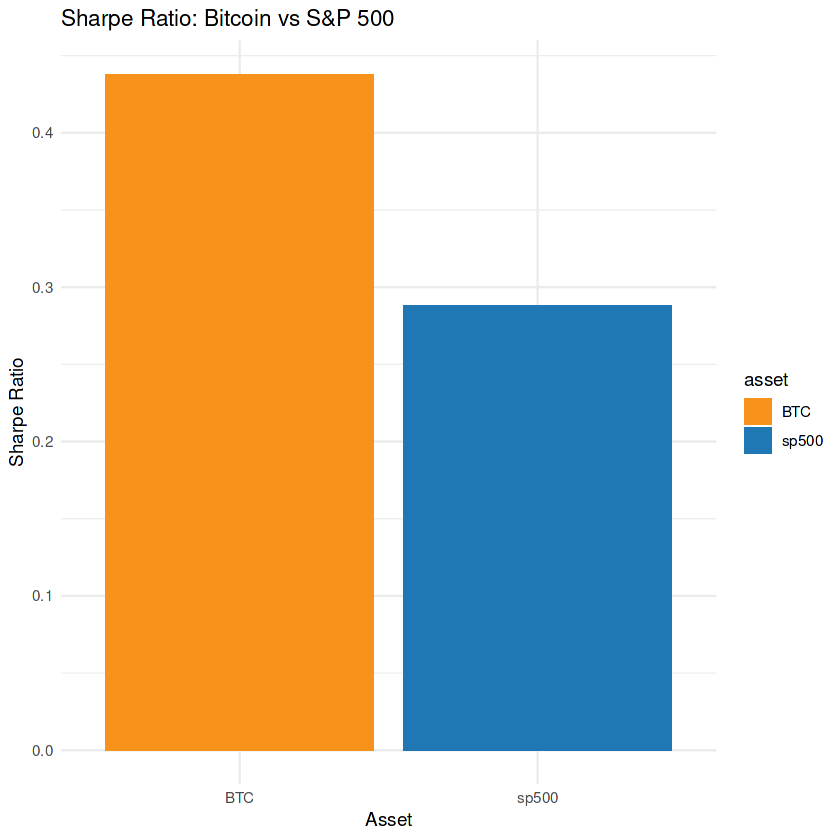

In [27]:
#Visualize Sharpe Ratio
btc_sharpe <- btc_sharpe %>%
    rename(sharpe_ratio = btc_sharpe_ratio) %>%
    mutate(asset = "BTC")

sp500_sharpe <- sp500_sharpe %>%
    rename(sharpe_ratio = sp500_sharpe_ratio) %>%
    mutate(asset = "sp500")

combined_sharpe <- rbind(btc_sharpe,sp500_sharpe)

ggplot(data=combined_sharpe) + geom_bar(mapping=aes(x=asset, y=sharpe_ratio,fill=asset),stat="identity") + 
  scale_fill_manual(values = c("BTC" = "#f7931a", "sp500" = "#1f77b4")) +
  labs(
    title = "Sharpe Ratio: Bitcoin vs S&P 500",
    x = "Asset",
    y = "Sharpe Ratio"
  ) + theme_minimal()

## 🔗 Correlation Analysis: BTC vs S&P 500 (Daily Returns)

To assess how closely the daily price movements of **Bitcoin (BTC)** and the **S&P 500** are related, I calculated the **Pearson correlation coefficient** using their daily returns.

In [28]:
#Check for correlation based on daily returns

#btc daily return
btc_df <- btc_df %>%
    arrange(Date) %>%
    mutate(btc_daily_return = (close_price / lag(close_price)) - 1)

#sp500 daily return
sp500_df <- sp500_df %>%
    arrange(Date) %>%
    mutate(sp500_daily_return = (close_price / lag(close_price)) - 1)

#merge based on date and daily returns
merged <- inner_join(
    select(btc_df, Date, btc_daily_return),
    select(sp500_df, Date, sp500_daily_return),
    by = "Date"
)
#finding the correlation between two assets
correlation_value <- cor(merged$btc_daily_return, merged$sp500_daily_return, use = "complete.obs")
print(paste("Correlation:", round(correlation_value,4)))

[1] "Correlation: 0.224"


### 📊 Interpretation
The Pearson correlation ranges from -1 to 1:

+1: Perfect positive correlation

0: No correlation

-1: Perfect negative correlation

0.224 Correlation: A low correlation indicates that BTC and the S&P 500 do not move together consistently.

##### Visualizing correlation based on daily returns of BTC and S&P 500


`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 1 row containing non-finite outside the scale range (`stat_smooth()`).”
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_point()`).”


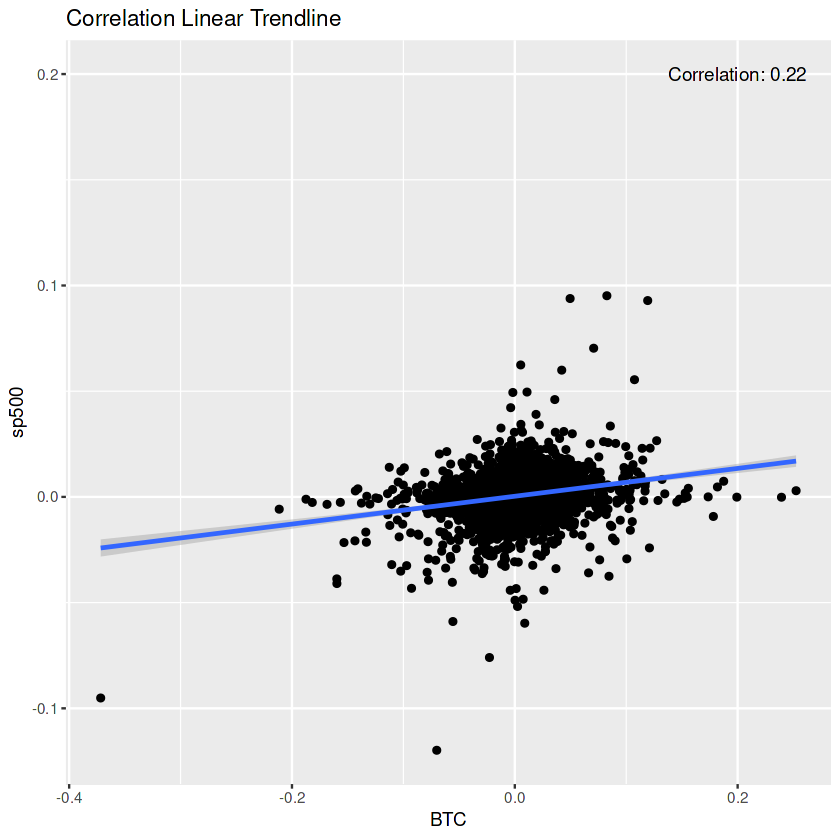

In [29]:
#Visualizing correlation of daily returns
ggplot(data=merged,aes(x = btc_daily_return, y = sp500_daily_return)) +
  geom_point() +
  geom_smooth(method = "lm") +
  labs(title = "Correlation Linear Trendline",
       x = "BTC",
       y = "sp500") +
  annotate("text", x=0.2, y=0.2, label = paste0("Correlation: ", round(correlation_value,2)))

## 📈 Correlation of Annual Returns: BTC vs S&P 500

In addition to daily return correlation, it's useful to examine whether **Bitcoin and the S&P 500 move together on a yearly basis**. I do this by calculating the **Pearson correlation coefficient** between their **annual returns**.

  annual_correlation
1          0.3011902


`geom_smooth()` using formula = 'y ~ x'


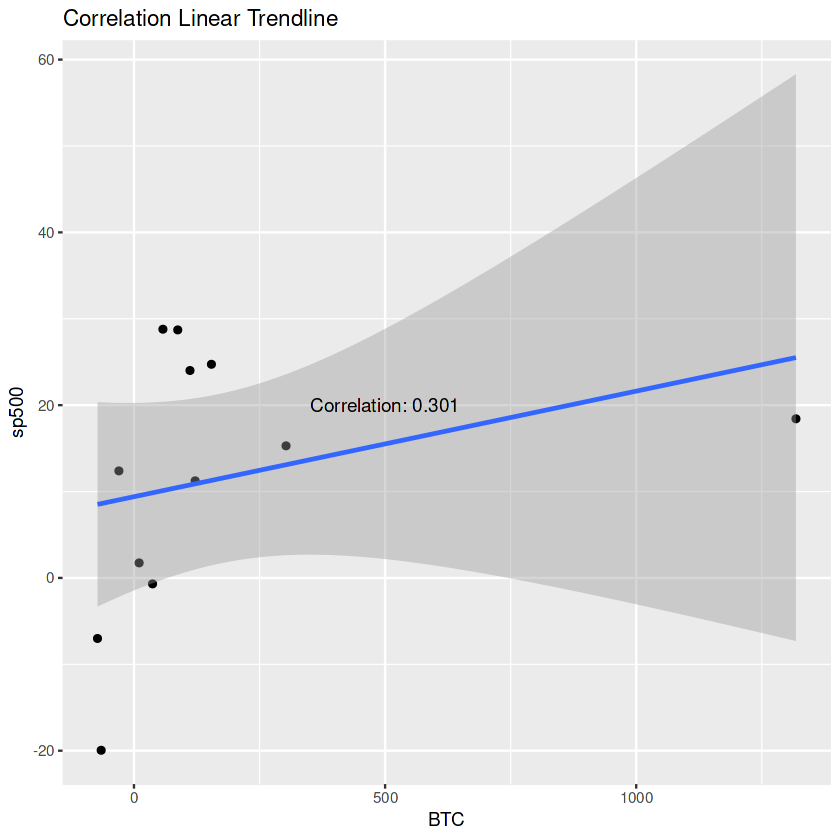

In [30]:
#Finding correlation of annual returns
annual_returns_correlation <- inner_join(
    select(btc_return, year, btc_annual_returns = annual_returns),
    select(sp500_return, year, sp500_annual_returns = annual_returns),
    by = "year"
)
annual_correlation <- annual_returns_correlation %>%
    summarize(annual_correlation = cor(annual_returns_correlation$btc_annual_returns, annual_returns_correlation$sp500_annual_returns, use = "complete.obs"))
print(annual_correlation)

#Visualizing correlation of annual returns
ggplot(data=annual_returns_correlation,aes(x = btc_annual_returns, y = sp500_annual_returns)) +
  geom_point() +
  geom_smooth(method = "lm") +
  labs(title = "Correlation Linear Trendline",
       x = "BTC",
       y = "sp500") +
  annotate("text", x=500, y=20, label = paste0("Correlation: ", round(annual_correlation$annual_correlation,3)))


### 🔍 Insight
0.3009756
The correlation value indicates the strength and direction of the relationship between BTC and S&P 500 every year.

The two assets show similarly low correlation every year as they did with the daily correlation. 


## 📦 Annual Trading Volume

To understand the market activity and investor interest over time, I calculated the **total trading volume per year** and **average volume increase per year.**


##### BTC annual volume

In [31]:
#BTC annual volume
btc_df$Date <- as.Date(btc_df$Date, format = "%Y-%m-%d")
btc_df$Date_str <- format(btc_df$Date, "%Y-%m-%d")

btc_volume <- sqldf("
SELECT strftime('%Y', Date_str) AS year, SUM(volume) AS Total_Volume
FROM btc_df
GROUP BY year
")

print(btc_volume)

   year Total_Volume
1  2014 2.526711e+09
2  2015 1.237553e+10
3  2016 3.144837e+10
4  2017 8.697464e+11
5  2018 2.213197e+12
6  2019 6.106628e+12
7  2020 1.208652e+13
8  2021 1.721185e+13
9  2022 1.095484e+13
10 2023 6.661590e+12
11 2024 1.370271e+13
12 2025 6.748134e+12


##### BTC average volume increase

In [32]:
#including column with annual volume increase
btc_annual_volume_increase <- btc_volume %>%
    mutate(btc_annual_volume_increase = (Total_Volume - lag(Total_Volume)) * 100 / lag(Total_Volume))
print(btc_annual_volume_increase)

#Finding average annual volume increase
btc_average_volume_increase <- btc_annual_volume_increase %>%
    summarize(btc_average_annual_volume_increase = mean(btc_annual_volume_increase, na.rm = TRUE))
print(btc_average_volume_increase)

   year Total_Volume btc_annual_volume_increase
1  2014 2.526711e+09                         NA
2  2015 1.237553e+10                  389.78815
3  2016 3.144837e+10                  154.11733
4  2017 8.697464e+11                 2665.63267
5  2018 2.213197e+12                  154.46458
6  2019 6.106628e+12                  175.91893
7  2020 1.208652e+13                   97.92458
8  2021 1.721185e+13                   42.40533
9  2022 1.095484e+13                  -36.35289
10 2023 6.661590e+12                  -39.19046
11 2024 1.370271e+13                  105.69727
12 2025 6.748134e+12                  -50.75328
  btc_average_annual_volume_increase
1                           332.6957


##### S&P 500 annual volume

In [33]:
#sp500 annual volume

sp500_df$Date <- as.Date(sp500_df$Date, format = "%Y-%m-%d")
sp500_df$Date_str <- format(sp500_df$Date, "%Y-%m-%d")

sp500_volume <- sqldf("
SELECT strftime('%Y', Date_str) AS year, SUM(volume) AS Total_Volume
FROM sp500_df
GROUP BY year
")

print (sp500_volume)

   year Total_Volume
1  1950 5.003000e+08
2  1951 4.276800e+08
3  1952 3.270400e+08
4  1953 3.547000e+08
5  1954 5.719800e+08
6  1955 6.484500e+08
7  1956 5.558300e+08
8  1957 5.587200e+08
9  1958 7.466600e+08
10 1959 8.200500e+08
11 1960 7.664400e+08
12 1961 1.017860e+09
13 1962 9.648200e+08
14 1963 1.147380e+09
15 1964 1.236120e+09
16 1965 1.555360e+09
17 1966 1.897290e+09
18 1967 2.528820e+09
19 1968 2.930700e+09
20 1969 2.846980e+09
21 1970 2.946730e+09
22 1971 3.894740e+09
23 1972 4.137370e+09
24 1973 4.057780e+09
25 1974 3.517600e+09
26 1975 4.697230e+09
27 1976 5.359110e+09
28 1977 5.277700e+09
29 1978 7.200080e+09
30 1979 8.162860e+09
31 1980 1.135063e+10
32 1981 1.185484e+10
33 1982 1.645638e+10
34 1983 2.158333e+10
35 1984 2.307963e+10
36 1985 2.751006e+10
37 1986 3.567949e+10
38 1987 4.779846e+10
39 1988 4.084802e+10
40 1989 4.169559e+10
41 1990 3.968273e+10
42 1991 4.533865e+10
43 1992 5.131460e+10
44 1993 6.697219e+10
45 1994 7.344834e+10
46 1995 8.724335e+10
47 1996 1.045

##### S&P 500 average volume increase

In [34]:
#including column with annual volume increase
sp500_annual_volume_increase <- sp500_volume %>%
    mutate(sp500_annual_volume_increase = (Total_Volume - lag(Total_Volume)) * 100 / lag(Total_Volume))
print(sp500_annual_volume_increase)

#Finding average annual volume increase
sp500_average_volume_increase <- sp500_annual_volume_increase %>%
    summarize(sp500_average_annual_volume_increase = mean(sp500_annual_volume_increase, na.rm = TRUE))
print(sp500_average_volume_increase)

   year Total_Volume sp500_annual_volume_increase
1  1950 5.003000e+08                           NA
2  1951 4.276800e+08                  -14.5152908
3  1952 3.270400e+08                  -23.5316124
4  1953 3.547000e+08                    8.4576810
5  1954 5.719800e+08                   61.2574006
6  1955 6.484500e+08                   13.3693486
7  1956 5.558300e+08                  -14.2832909
8  1957 5.587200e+08                    0.5199431
9  1958 7.466600e+08                   33.6376002
10 1959 8.200500e+08                    9.8291056
11 1960 7.664400e+08                   -6.5374063
12 1961 1.017860e+09                   32.8036115
13 1962 9.648200e+08                   -5.2109327
14 1963 1.147380e+09                   18.9216641
15 1964 1.236120e+09                    7.7341421
16 1965 1.555360e+09                   25.8259716
17 1966 1.897290e+09                   21.9839780
18 1967 2.528820e+09                   33.2858973
19 1968 2.930700e+09                   15.8919971


### 📌 Interpretation
332.6378 vs 11.48469
Bitcoin's averave volume increase is significantly higher than that of the S&P 500. This could indicate increasing interest and higher volatility periods as an asset like Bitcoin could see higher interest during certain periods.

## 🔁 Correlation Between Volume and Price Movement

To explore whether **trading volume is associated with its annual price movement**, I calculated the correlation between:

- **Annual % increase in trading volume**
- **Annual return (price change)**


##### BTC price/volume correlation

In [35]:
#BTC correlation with volume and price movement 
btc_price_volume_correlation <- btc_annual_volume_increase %>%
    select(-Total_Volume) %>%
    inner_join(btc_return, by = "year")

print(btc_price_volume_correlation)

#BTC volume-price correlation
btc_correlation_value <- btc_price_volume_correlation %>%
    summarize(Volume_Price_Correlation = cor(btc_annual_volume_increase, annual_returns, use = "complete.obs"))
print(btc_correlation_value)

   year btc_annual_volume_increase annual_returns asset
1  2014                         NA         -29.99   BTC
2  2015                  389.78815          37.01   BTC
3  2016                  154.11733         121.89   BTC
4  2017                 2665.63267        1318.02   BTC
5  2018                  154.46458         -72.60   BTC
6  2019                  175.91893          87.16   BTC
7  2020                   97.92458         302.79   BTC
8  2021                   42.40533          57.64   BTC
9  2022                  -36.35289         -65.30   BTC
10 2023                  -39.19046         154.23   BTC
11 2024                  105.69727         111.53   BTC
12 2025                  -50.75328          10.28   BTC
  Volume_Price_Correlation
1                0.9516624


##### S&P 500 price/volume correlation

In [36]:
#sp500 correlation with volume and price movement 
sp500_price_volume_correlation <- sp500_annual_volume_increase %>%
    select(-Total_Volume) %>%
    inner_join(sp500_return, by = "year")

print(sp500_price_volume_correlation)

#sp500 volume-price correlation
sp500_correlation_value <- sp500_price_volume_correlation %>%
    summarize(Volume_Price_Correlation = cor(sp500_annual_volume_increase, annual_returns, use = "complete.obs"))
print(sp500_correlation_value)

   year sp500_annual_volume_increase annual_returns asset
1  1950                           NA          22.63 sp500
2  1951                  -14.5152908          14.44 sp500
3  1952                  -23.5316124          11.64 sp500
4  1953                    8.4576810          -6.52 sp500
5  1954                   61.2574006          44.21 sp500
6  1955                   13.3693486          23.76 sp500
7  1956                  -14.2832909           3.34 sp500
8  1957                    0.5199431         -13.44 sp500
9  1958                   33.6376002          36.90 sp500
10 1959                    9.8291056           8.03 sp500
11 1960                   -6.5374063          -3.00 sp500
12 1961                   32.8036115          24.28 sp500
13 1962                   -5.2109327         -11.08 sp500
14 1963                   18.9216641          19.67 sp500
15 1964                    7.7341421          12.36 sp500
16 1965                   25.8259716           9.74 sp500
17 1966       

### 📊 Interpretation

- 📈 **Bitcoin (BTC)** shows a **strong positive correlation (~0.95)**, suggesting that years with higher increases in trading volume tend to be strongly associated with higher price returns.
- 📉 **S&P 500**, on the other hand, shows a **weak positive correlation (~0.17)**. This implies that while there may be a slight relationship between volume and returns, it is much less pronounced..

##### BTC volume-price correlation

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 1 row containing non-finite outside the scale range (`stat_smooth()`).”
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_point()`).”


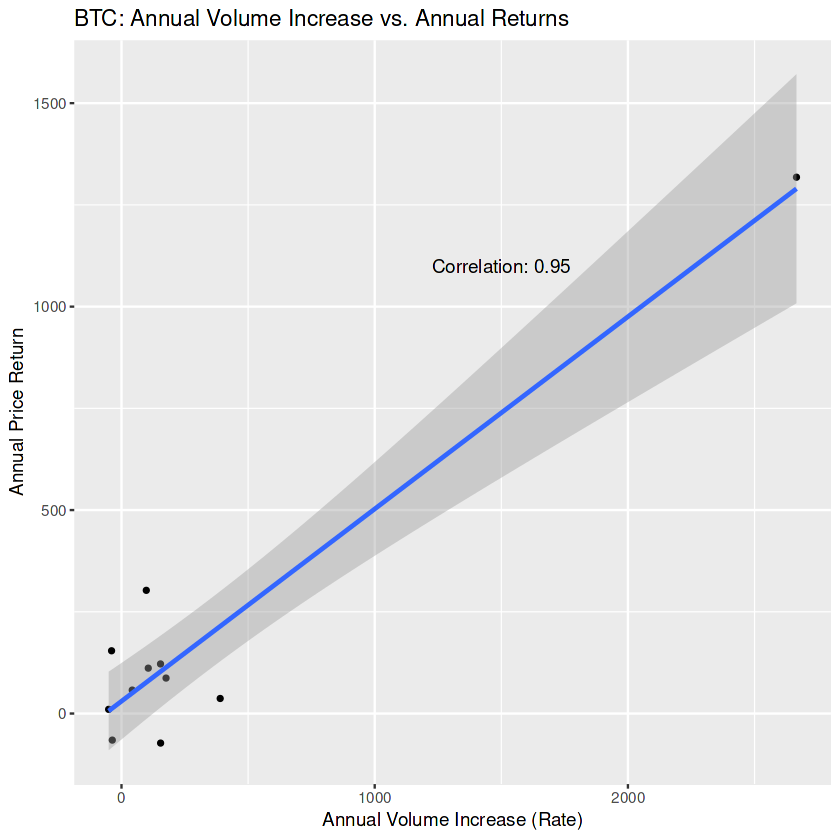

In [37]:
#Visualizing BTC volume-price correlation
ggplot(data=btc_price_volume_correlation, aes(x=btc_annual_volume_increase, y=annual_returns)) + geom_point(size=1) + geom_smooth(method="lm") +
labs(title = "BTC: Annual Volume Increase vs. Annual Returns",
    x = "Annual Volume Increase (Rate)",
    y = "Annual Price Return"
  ) + annotate("text", x=1500, y=1100, label = paste0("Correlation: ", round(btc_correlation_value$Volume_Price_Correlation,2)))

##### S&P 500 volume-price correlation

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 1 row containing non-finite outside the scale range (`stat_smooth()`).”
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_point()`).”


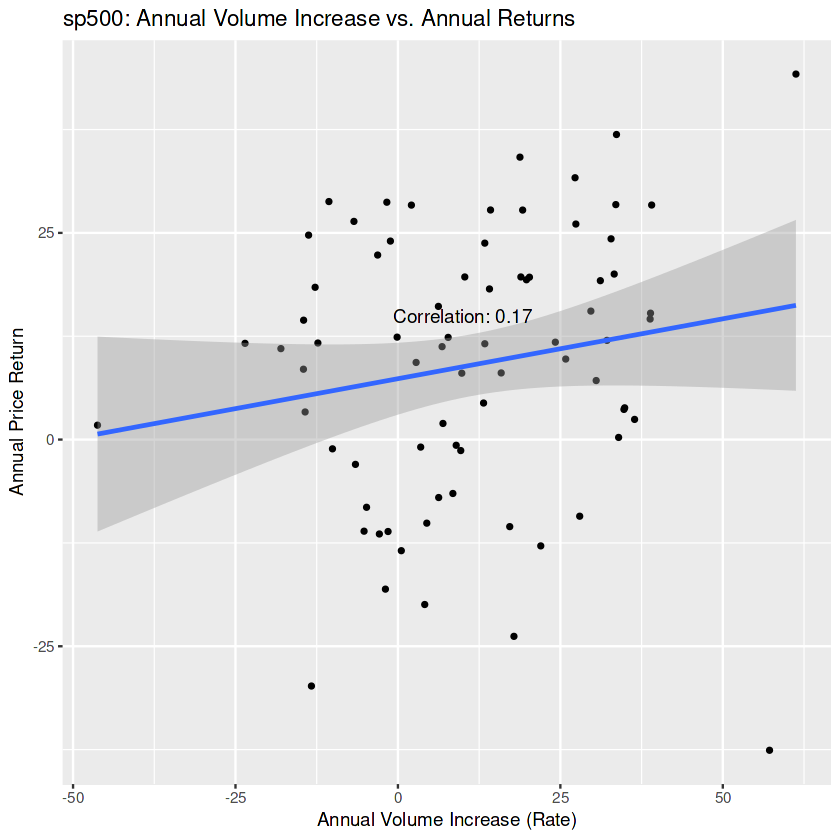

In [38]:
#Visualizing sp500 volume-price correlation
ggplot(data=sp500_price_volume_correlation, aes(x=sp500_annual_volume_increase, y=annual_returns)) + geom_point(size=1) + geom_smooth(method="lm") +
labs(title = "sp500: Annual Volume Increase vs. Annual Returns",
    x = "Annual Volume Increase (Rate)",
    y = "Annual Price Return"
  ) + annotate("text", x=10, y=15, label = paste0("Correlation: ", round(sp500_correlation_value$Volume_Price_Correlation,2)))

### 🧠 Insight

This comparison reveals key behavioral differences between the two markets:
- **BTC** may behave more like a sentiment-driven asset, where **volume surges align with speculative price rallies**.
- **S&P 500** behaves more like an efficient, institutional-driven market where **volume is not a strong driver of annual price movement**.

## 📌 Key Takeaways

- **Performance**: BTC has significantly outperformed the S&P 500 in terms of raw return.
- **Volatility**: BTC is significantly more volatile, both in terms of price movements and volume.
- **Correlation**: The two assets show low or inconsistent correlation, suggesting potential diversification benefits. However, BTC has a strong correlation with its price and volume.

---

## 🧾 Conclusion & Prospects

Based on the analyzed data, Bitcoin is a better long-term investment. Bitcoin offers significantly higher return potential though it is more volatile, and therefore more risky. This volatility, however, is offset for long-term investments, as Bitcoin's price trend and Sharpe Ratio outperform those of the S&P 500. S&P 500 remains a more stable, traditional investment, with significantly lower expected returns. Both assets show relatively low correlation, which can be useful in constructing diversified portfolios.
While the S&P 500 is a slow, upward-trending safe investment, Bitcoin could see higher price surges in an increasingly traction-gaining asset, especially as volume and market capitalization correlate highly with price movements. While past performance does not dictate future returns, the analysis proves that long-term Bitcoin holders should have higher returns than traditional S&P 500 fund holders. 

---

## 📚 References

- Yahoo Finance: [https://finance.yahoo.com](https://finance.yahoo.com)
- R Libraries: `dplyr`, `tidyverse`, `ggplot2`, `lubridate`, `quantmod`, `sqldf`
  